In [1]:
pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 335.8 kB/s eta 0:00:001m683.0 kB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 1.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 1.2 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.7/757.7 kB 3.3 MB/s eta 0:00:000:00:01m eta 0:00:01
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=3bf180af906ba85c4f7781fef3058343ba3fcfe89a22b2be0f81b498579fa444
  Stored in directory: /home/agustin/.cache/pip/wheels/dc/c3/8b/dac097e67e37feffab9ad50a7d36b9a7f7975014e3da088183
Successfully built factor_analyzer

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to rest

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer

In [4]:
# Importamos datos desde un archivo CSV
data_path = 'NotasAlumnos.txt'
mydata = pd.read_csv(data_path, sep=';')
mydata

,Leng,Matem,Fisica,Ingles,Filos,Historia,Quimica,EducFisica
0,8,9,9,9,9,9,9,8
1,8,9,10,8,8,7,9,3
2,8,5,5,8,9,9,5,4
3,7,8,8,7,7,6,7,9
4,7,4,5,7,8,8,4,6
5,7,5,4,7,7,8,5,7
6,7,4,4,7,8,7,4,5
7,7,2,4,8,7,7,3,6
8,7,4,3,8,4,7,3,8
9,5,8,7,6,5,6,7,5


In [5]:
# Calificaciones
print ("Head: ")
print(mydata.head())
print ("Shape: ")
print(mydata.shape)
print ("Info: ")
print(mydata.info())

Head: 
   Leng  Matem  Fisica  Ingles  Filos  Historia  Quimica  EducFisica
0     8      9       9       9      9         9        9           8
1     8      9      10       8      8         7        9           3
2     8      5       5       8      9         9        5           4
3     7      8       8       7      7         6        7           9
4     7      4       5       7      8         8        4           6
Shape: 
(20, 8)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Leng        20 non-null     int64
 1   Matem       20 non-null     int64
 2   Fisica      20 non-null     int64
 3   Ingles      20 non-null     int64
 4   Filos       20 non-null     int64
 5   Historia    20 non-null     int64
 6   Quimica     20 non-null     int64
 7   EducFisica  20 non-null     int64
dtypes: int64(8)
memory usage: 1.4 KB
None


In [6]:
# Matriz de correlación de Pearson
correlacion = np.round(mydata.corr(), 2)
print(correlacion)
print(np.round(np.cov(mydata, rowvar=False), 2))  # Covarianza

            Leng  Matem  Fisica  Ingles  Filos  Historia  Quimica  EducFisica
Leng        1.00   0.08    0.18    0.96   0.89      0.91     0.15        0.26
Matem       0.08   1.00    0.92    0.11   0.10      0.07     0.92       -0.02
Fisica      0.18   0.92    1.00    0.20   0.20      0.10     0.91       -0.03
Ingles      0.96   0.11    0.20    1.00   0.82      0.90     0.13        0.29
Filos       0.89   0.10    0.20    0.82   1.00      0.89     0.23        0.09
Historia    0.91   0.07    0.10    0.90   0.89      1.00     0.16        0.30
Quimica     0.15   0.92    0.91    0.13   0.23      0.16     1.00       -0.08
EducFisica  0.26  -0.02   -0.03    0.29   0.09      0.30    -0.08        1.00
[[ 2.34  0.28  0.63  2.87  2.75  2.86  0.51  0.76]
 [ 0.28  4.89  4.57  0.49  0.43  0.33  4.38 -0.08]
 [ 0.63  4.57  5.08  0.9   0.93  0.46  4.4  -0.13]
 [ 2.87  0.49  0.9   3.82  3.22  3.59  0.56  1.08]
 [ 2.75  0.43  0.93  3.22  4.09  3.67  1.    0.34]
 [ 2.86  0.33  0.46  3.59  3.67  4.2   0.68

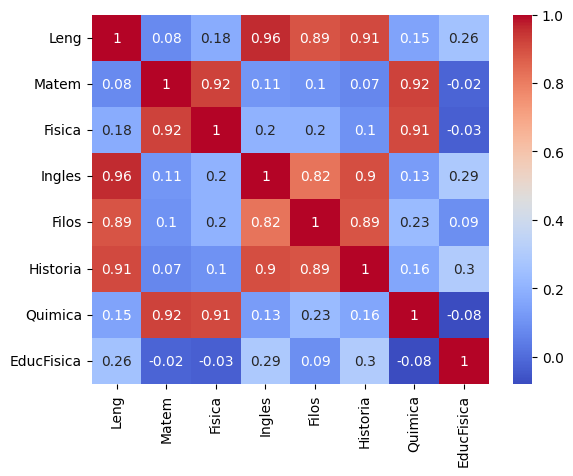

In [7]:
# Graficamos los datos de correlaciones en un mapa de calor
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.show()

Educacion fisica no tiene relacion cercana con ningun otra materia

/home/agustin/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


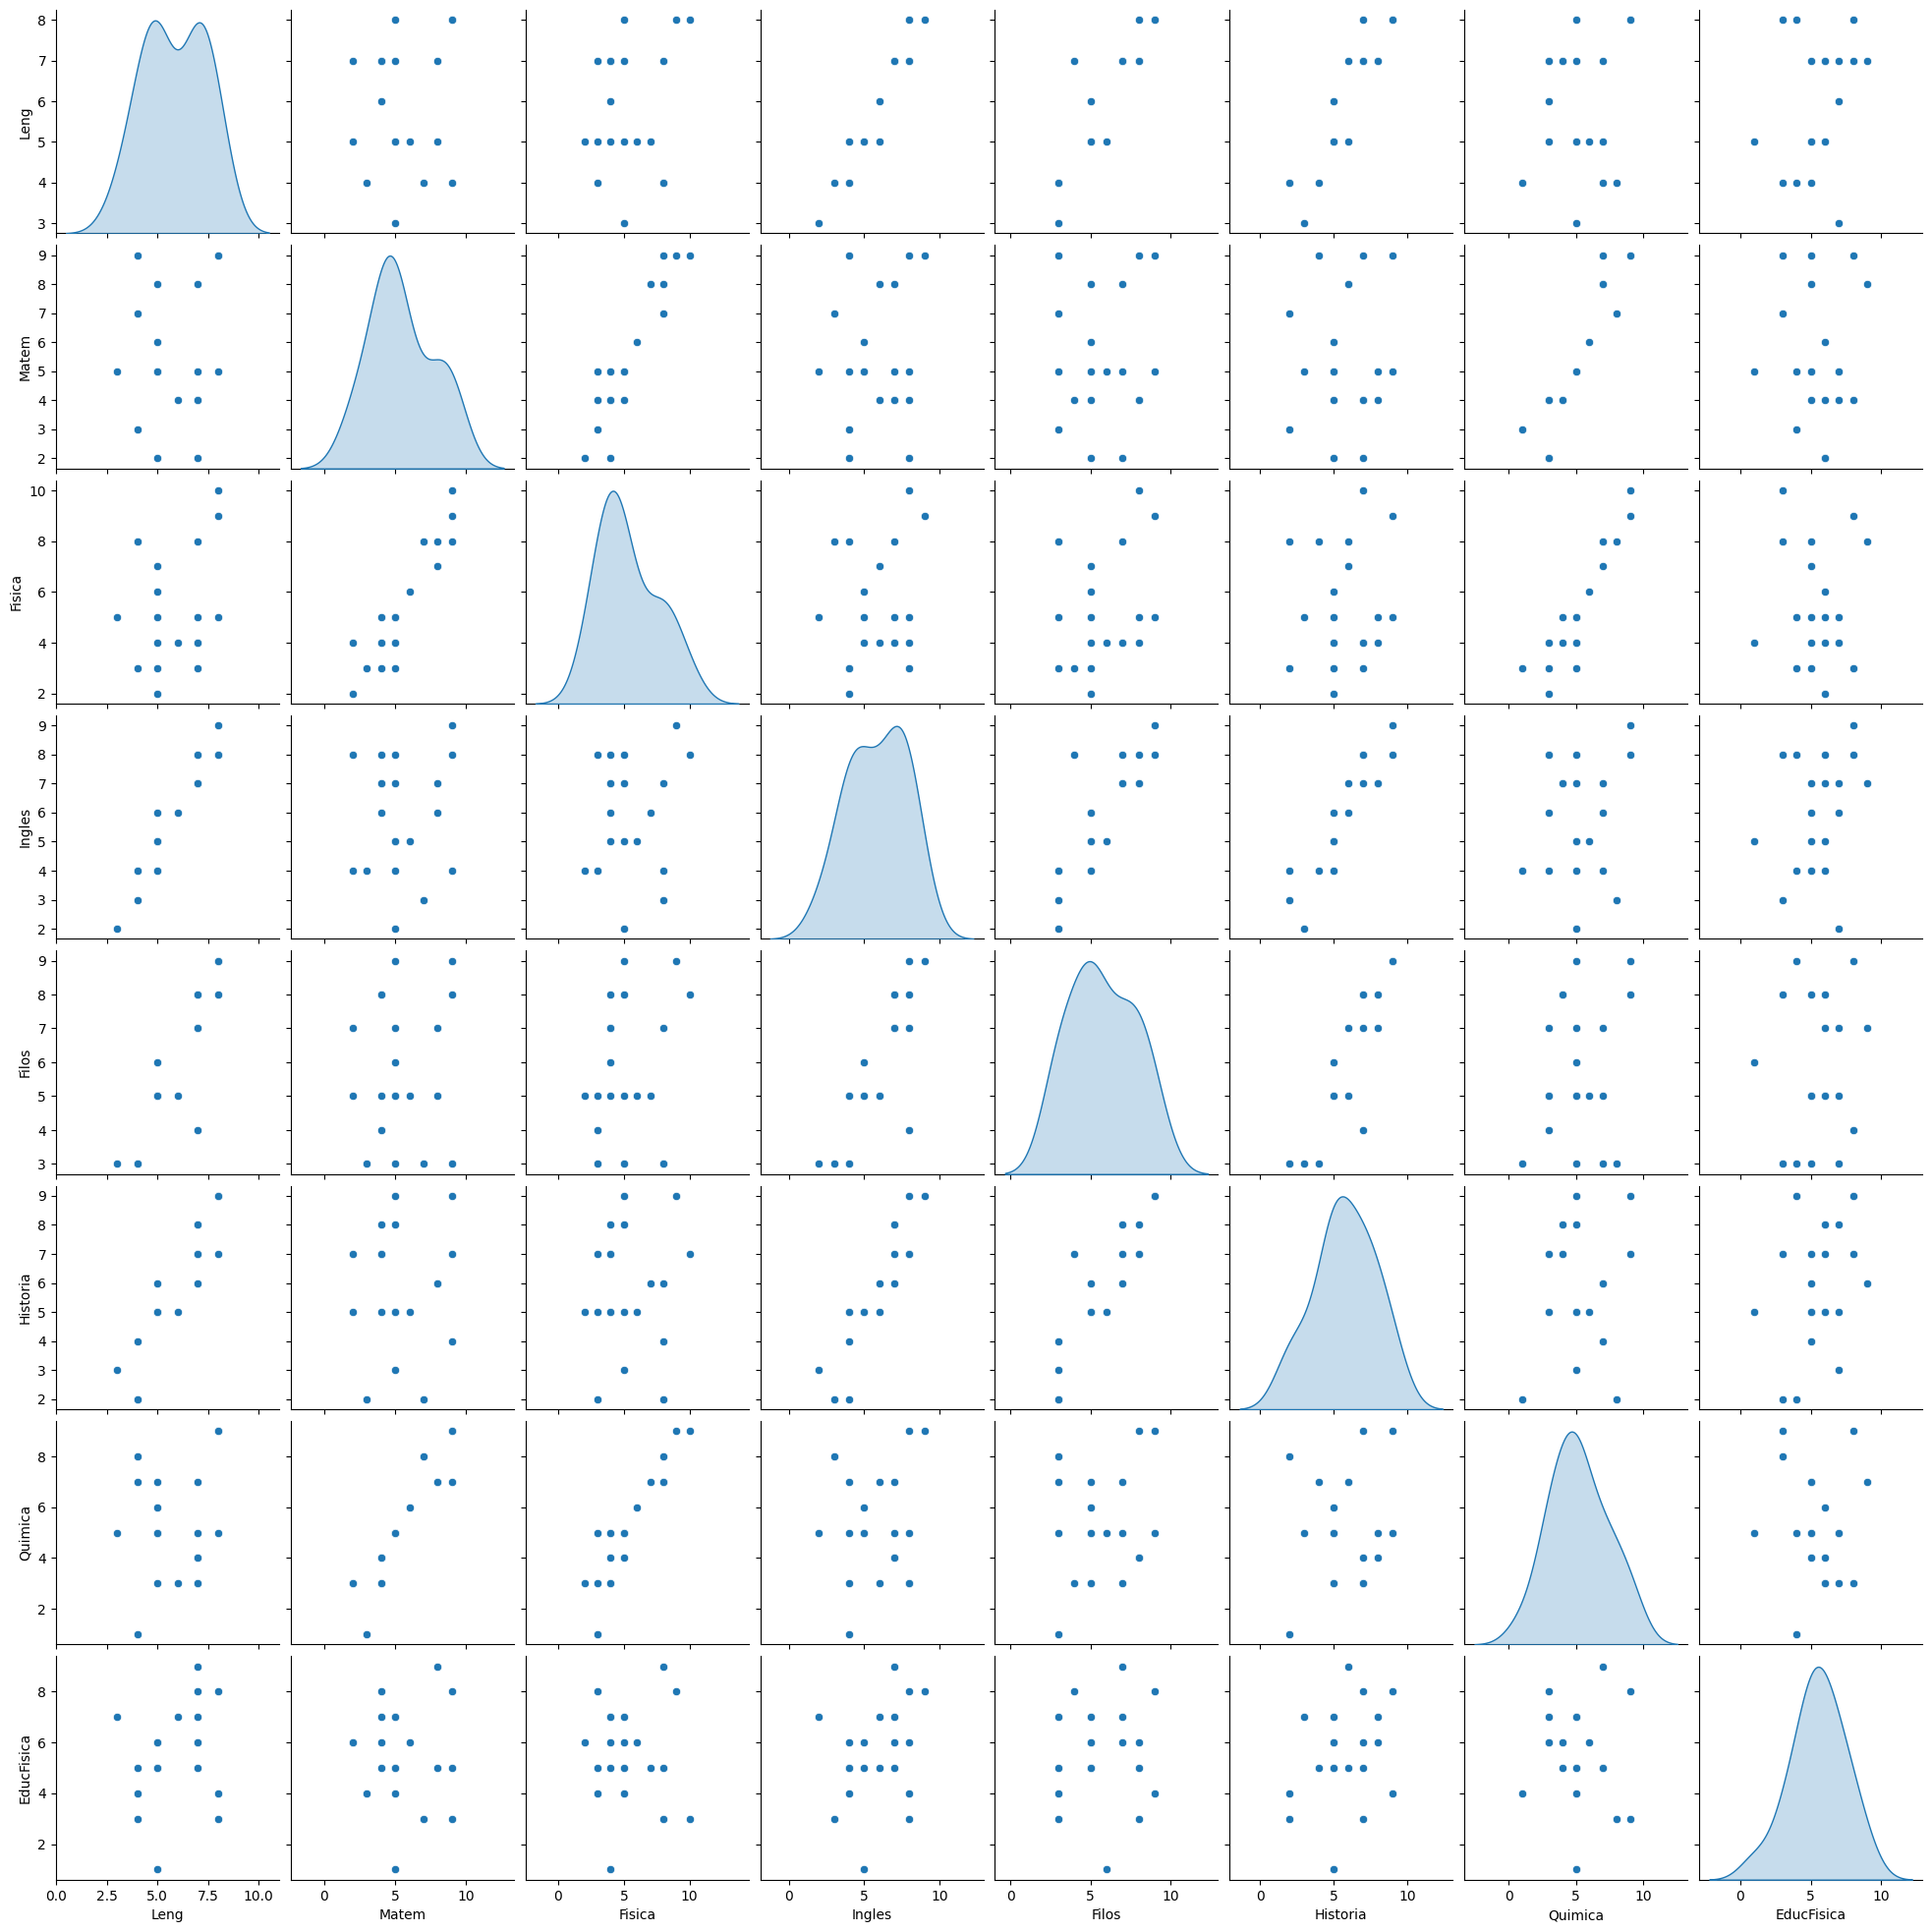

In [8]:
# Matriz de scatterplot
sns.pairplot(mydata.iloc[:, :8], diag_kind='kde')
plt.show()

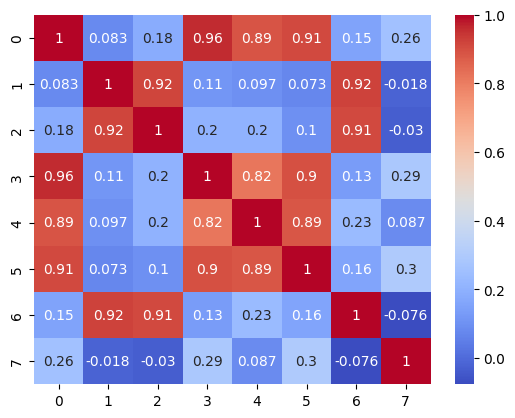

In [9]:
# Paso 1.1 Verificar que la matriz sea factorizable.
fa = FactorAnalyzer()
fa.fit(mydata)
mat_cor = fa.corr_
sns.heatmap(mat_cor, annot=True, cmap='coolwarm')
plt.show()

In [10]:
# Aplicamos el Análisis de Componente Principal (PCA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(mydata)
pca = PCA()
objeto = pca.fit(data_scaled)

# Desviación estándar de cada componente principal.
print(objeto.singular_values_)
# Varianza explicada por cada CP
print(objeto.explained_variance_)
# Cantidad de variables
print(np.sum(objeto.explained_variance_))

[8.90737146 7.27624163 4.34550463 2.02349477 1.58863349 1.02761833
 0.9048767  0.58184377]
[4.17585612 2.78651012 0.99386371 0.21550164 0.13282928 0.05557892
 0.04309483 0.01781801]
8.421052631578958


Varianza Acumulada de cada Componente Principal:
[0.49588291 0.82678099 0.94480231 0.97039313 0.9861666  0.9927666
 0.99788411 1.        ]


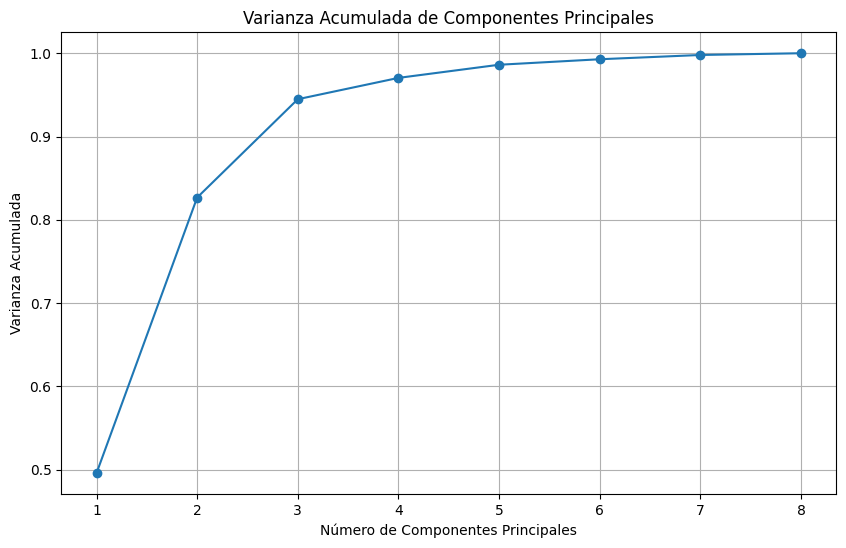

In [11]:
# Varianza acumulada de cada componente principal
varianza_acumulada = np.cumsum(objeto.explained_variance_ratio_)
print("Varianza Acumulada de cada Componente Principal:")
print(varianza_acumulada)

# Gráfico de la Varianza Acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza Acumulada de Componentes Principales')
plt.xticks(range(1, len(varianza_acumulada) + 1))
plt.grid(True)
plt.show()

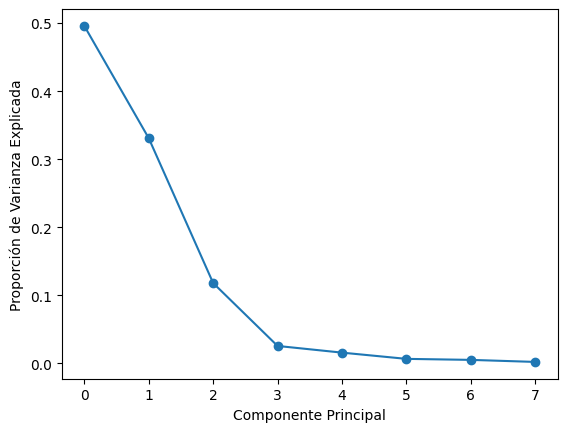

In [12]:
# Scree plot
plt.plot(objeto.explained_variance_ratio_, marker='o')
plt.xlabel('Componente Principal')
plt.ylabel('Proporción de Varianza Explicada')
plt.show()

In [13]:
# Modelo de análisis paralelo
fa = FactorAnalyzer()
fa.fit(mydata)
print(fa.loadings_)

# Normalizamos los scores al rango [0, 1]
n_scores = np.sqrt(mydata.shape[0] - 1)
data_normalized = objeto.transform(data_scaled) / n_scores

[[ 0.91333519  0.00838906  0.12535661]
 [-0.10900011  0.99494052  0.09153416]
 [ 0.02584562  0.94417271  0.00653723]
 [ 0.81664329  0.04452675  0.24856924]
 [ 1.11282794 -0.02450147 -0.34383293]
 [ 0.88849328 -0.02041731  0.12800665]
 [ 0.08563705  0.93805112 -0.12395903]
 [ 0.0182083  -0.00836349  0.46839414]]


Matriz de Componentes Principales:
       Leng     Matem    Fisica    Ingles     Filos  Historia   Quimica  \
0  0.464211  0.203276  0.240195  0.457040  0.445153  0.452414  0.236663   
1 -0.195805  0.542816  0.518081 -0.185988 -0.150027 -0.212441  0.523542   
2  0.066087 -0.107746 -0.053006  0.010862  0.256481  0.025130  0.003793   
3  0.265295  0.086419  0.264733  0.585352 -0.517423 -0.303186 -0.357776   
4 -0.142847  0.403306 -0.498041  0.129685 -0.472436  0.544860  0.113661   
5  0.370070 -0.531780 -0.100359 -0.003659 -0.370416 -0.059936  0.655224   
6 -0.524106 -0.445284  0.498376  0.166903 -0.147541  0.476140 -0.028400   
7  0.489260  0.035049  0.307425 -0.607520 -0.252289  0.361197 -0.314375   

   EducFisica  
0    0.133262  
1   -0.149250  
2   -0.956382  
3   -0.147576  
4   -0.138161  
5   -0.007310  
6   -0.038946  
7   -0.053492  


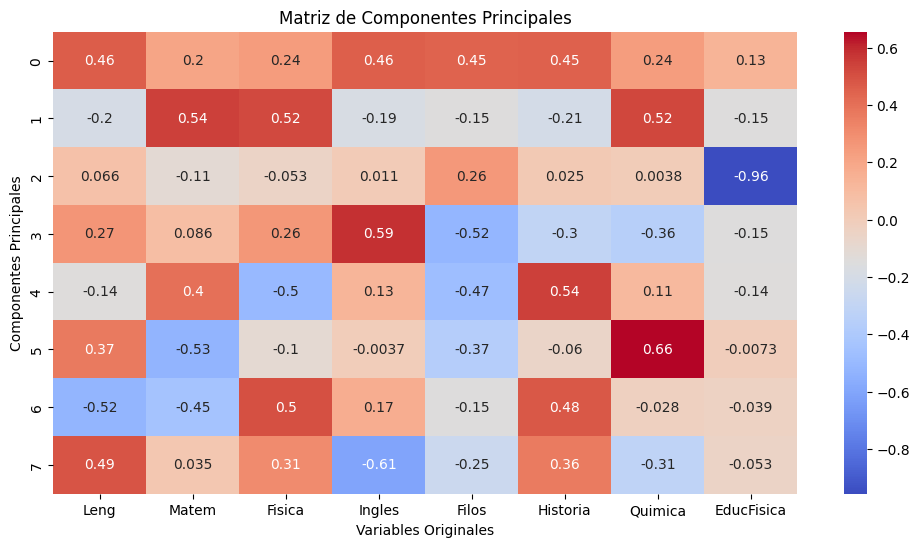

In [14]:
# Matriz de Componentes Principales
componentes_matrix = pd.DataFrame(data=objeto.components_, columns=mydata.columns)
print("Matriz de Componentes Principales:")
print(componentes_matrix)

# Visualización de la Matriz de Componentes
plt.figure(figsize=(12, 6))
sns.heatmap(componentes_matrix, annot=True, cmap='coolwarm')
plt.xlabel('Variables Originales')
plt.ylabel('Componentes Principales')
plt.title('Matriz de Componentes Principales')
plt.show()

Matriz de Componentes Principales (3 primeras componentes):
       Leng     Matem    Fisica    Ingles     Filos  Historia   Quimica  \
0  0.464211  0.203276  0.240195  0.457040  0.445153  0.452414  0.236663   
1 -0.195805  0.542816  0.518081 -0.185988 -0.150027 -0.212441  0.523542   
2  0.066087 -0.107746 -0.053006  0.010862  0.256481  0.025130  0.003793   

   EducFisica  
0    0.133262  
1   -0.149250  
2   -0.956382  


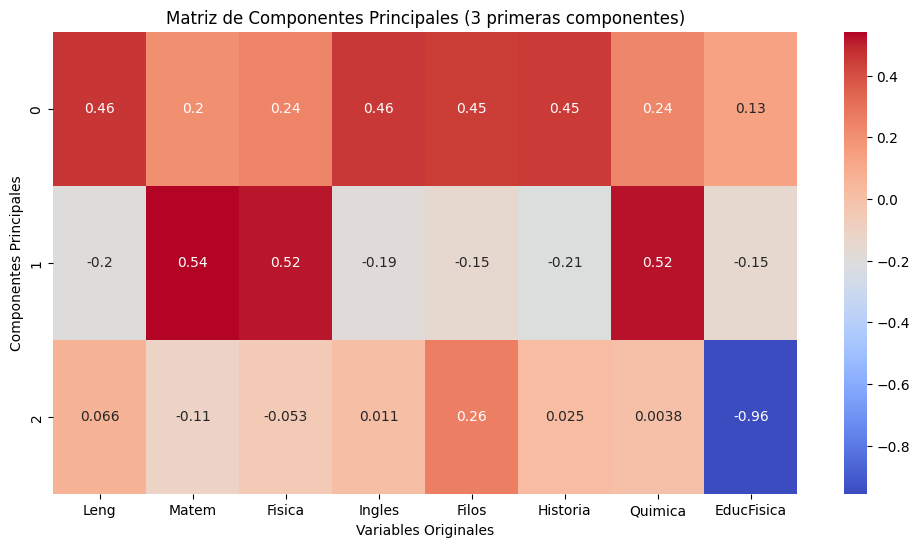

In [15]:
# Matriz de Componentes Principales para las 3 primeras componentes
componentes_matrix_2 = pd.DataFrame(data=objeto.components_[:3, :], columns=mydata.columns)
print("Matriz de Componentes Principales (3 primeras componentes):")
print(componentes_matrix_2)

# Visualización de la Matriz de Componentes para las 2 primeras componentes
plt.figure(figsize=(12, 6))
sns.heatmap(componentes_matrix_2, annot=True, cmap='coolwarm')
plt.xlabel('Variables Originales')
plt.ylabel('Componentes Principales')
plt.title('Matriz de Componentes Principales (3 primeras componentes)')
plt.show()

In [16]:
# Transformación del dataset utilizando las tres primeras componentes principales
num_components = 3  # Cambiar el número de componentes principales según sea necesario
data_transformed = pca.transform(data_scaled)[:, :num_components]

# Crear un nuevo DataFrame con las tres primeras componentes principales
columns = [f'PC{i+1}' for i in range(num_components)]
df_transformed = pd.DataFrame(data=data_transformed, columns=columns)
df_transformed['Individuo'] = mydata.index

# Mostrar el DataFrame transformado
print("Dataset Transformado utilizando las 3 primeras componentes principales:")
print(df_transformed)

Dataset Transformado utilizando las 3 primeras componentes principales:
         PC1       PC2       PC3  Individuo
0   4.235980  1.326537 -0.950730          0
1   3.072798  2.344919  1.402165          1
2   2.445285 -1.212236  1.363097          2
3   1.954215  1.056114 -1.741461          3
4   1.375773 -1.461862  0.203419          4
5   1.319040 -1.198257 -0.458296          5
6   0.969163 -1.512058  0.722554          6
7   0.752157 -2.367148  0.188722          7
8   0.295555 -2.029512 -1.292551          8
9   0.248401  1.649397 -0.041385          9
10 -0.558645  0.784110 -0.445000         10
11 -0.684167 -1.251321 -0.759854         11
12 -0.946327  0.125004  0.134882         12
13 -1.112786  0.129971  2.319470         13
14 -1.243623  2.828441 -0.456511         14
15 -1.404935 -0.248936  0.177429         15
16 -1.953087 -1.820787 -0.159736         16
17 -2.153411  3.044440  0.629583         17
18 -3.051508  0.886878 -1.271312         18
19 -3.559878 -1.073694  0.435516         19
